## Preamble



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from getdist import plots, MCSamples

## MCMC chains



In [1]:
output_path = "/home/garrido/Workdir/CMB/development/toy_likelihood/output"

In [1]:
import pandas as pd
import glob
def get_chains(path, drop=None, keep=None):
    all_files = glob.glob(path)
    # Sort alphabetically
    all_files.sort()
    chains = {}
    for f in all_files:
        df = pd.read_csv(f, delim_whitespace=True)
        weights = df.iloc[:,0]
        if keep is not None:
            df = df.filter(items=keep)
        elif drop is not None:
            df.drop(columns=drop, inplace=True)
        key = f.split("/")[-1]
        # Take into account weights
        # weights = np.full_like(weights, 1)
        chains[key] = np.repeat(np.array(df),
                                np.array(weights, dtype=int),
                                axis=0)
    return chains

def plot_chains(path, burnin=0, labels=None, nrow=None, ncol=None, drop=None, keep=None, legend=False):
    chains = get_chains(path=path, drop=drop, keep=keep)
    if not labels:
        labels = keep
        if isinstance(keep, list):
            import os
            fn = os.path.dirname(glob.glob(path)[0]) + "/mcmc.updated.yaml"
            if os.path.exists(fn):
              import yaml
              with open(fn, "r") as stream:
                  setup = yaml.load(stream, Loader=yaml.FullLoader)
              labels = ["${}$".format(setup["params"][k].get("latex", k)) for k in keep]

    nrow = len(labels)//2 if nrow is None else nrow
    ncol = len(labels)//2 if ncol is None else ncol
    fig = plt.figure(figsize=(15, 10))
    for i, label in enumerate(labels):
        plt.subplot(nrow, ncol, i+1)
        plt.ylabel(label)
        for k, v in chains.items():
            ist = int((1.-burnin)*len(v)) if 0 < burnin < 1 else int(burnin)
            j = k.split(".")[1]
            plt.plot(v[ist:, i], alpha=0.75, color="C{}".format(j))
        if legend and i+1 == nrow:
            plt.legend(list(chains.keys()), loc="upper left", bbox_to_anchor=(1,1))
    plt.tight_layout()

# Out[148]:

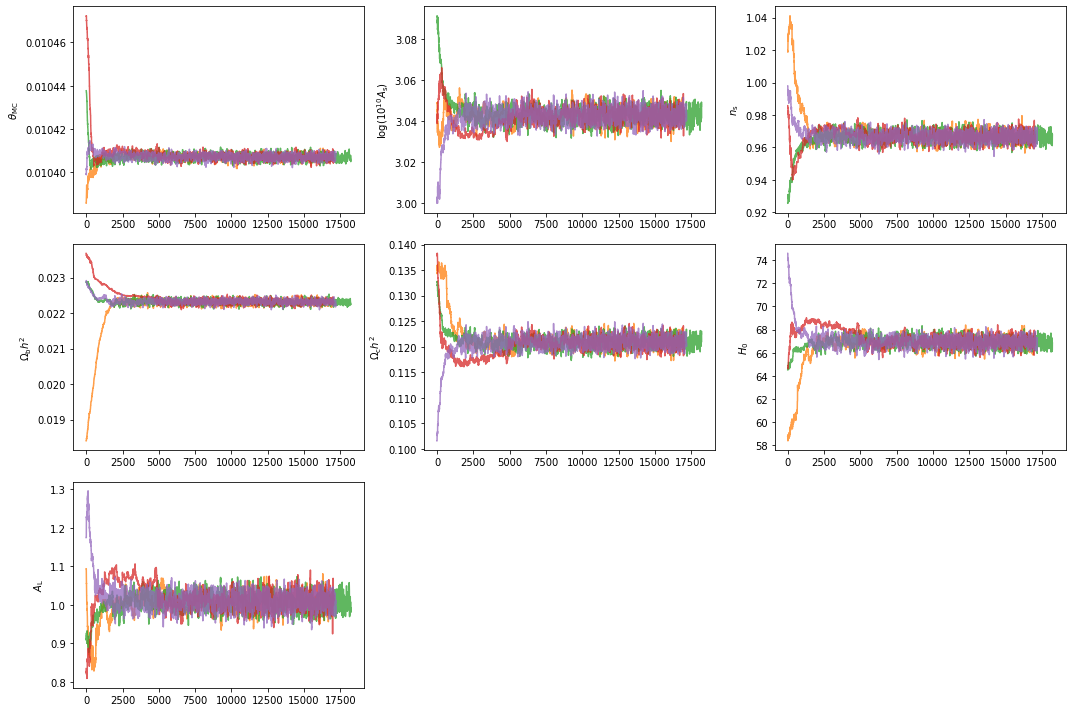

In [1]:
columns = [
    "cosmomc_theta",
    "logA",
    "ns",
    "ombh2",
    "omch2",
    "H0",
    "Alens"
]
plot_chains(output_path + "/mcmc*ee/mcmc.?.txt", keep=columns)

## MCMC distributions



In [2]:
def show_ref(g, params):
    import yaml
    with open("../global.yaml", "r") as stream:
        setup = yaml.load(stream, Loader=yaml.FullLoader)
    cosmo_params = setup["simulation"]["cosmo. parameters"]
    cosmo_params.update({"H0": 67.36})
    for i, p in enumerate(params):
        ref_value = cosmo_params[p]
        kwargs = dict(color="gray", ls="--", lw=1)
        for ax in g.subplots[:,i]:
            if ax: ax.axvline(ref_value, **kwargs)
        for ax in g.subplots[i,:i]:
            if ax: ax.axhline(ref_value, **kwargs)

In [3]:
from getdist import loadMCSamples
chain_dir = "/home/garrido/Workdir/CMB/development/toy_likelihood/output"
samples = loadMCSamples(chain_dir + "/mcmc_pslike_tt-te-ee/mcmc", no_cache=True, settings={"ignore_rows": 0.4})

/home/garrido/Workdir/CMB/development/toy_likelihood/output/mcmc_pslike_tt-te-ee/mcmc.1.txt
/home/garrido/Workdir/CMB/development/toy_likelihood/output/mcmc_pslike_tt-te-ee/mcmc.2.txt
/home/garrido/Workdir/CMB/development/toy_likelihood/output/mcmc_pslike_tt-te-ee/mcmc.3.txt
/home/garrido/Workdir/CMB/development/toy_likelihood/output/mcmc_pslike_tt-te-ee/mcmc.4.txt
Removed 0.4 as burn in


### Triangle plot



/home/garrido/.local/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


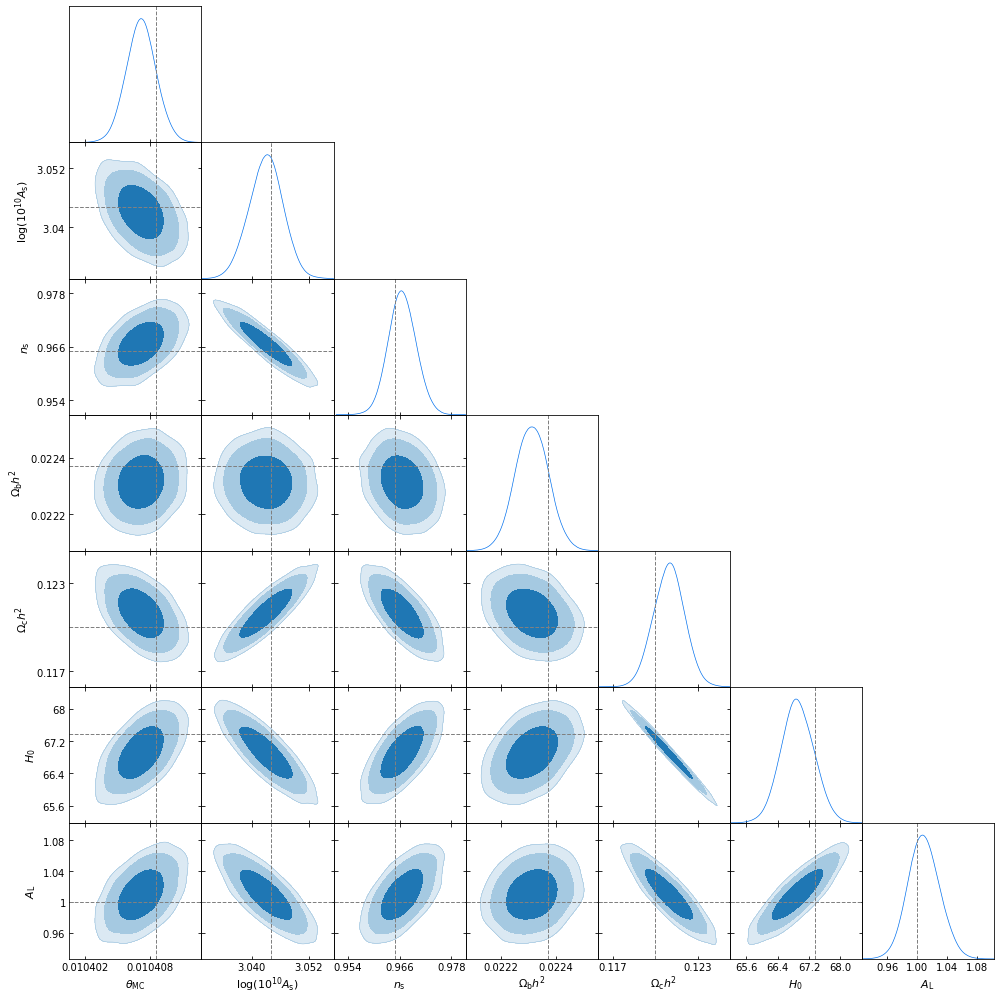

In [4]:
g = plots.getSubplotPlotter()
g.settings.num_plot_contours = 3
g.settings.lineM = ["-CO"]
# roots = ["mcmc_pslike_tt-te-ee/mcmc"]
params = [
    "cosmomc_theta",
    "logA",
    "ns",
    "ombh2",
    "omch2",
    "H0",
    "Alens"
]
g.triangle_plot(samples, params, filled=True, colors=["C0"])
show_ref(g, params)

### Table



In [10]:
samples.getTable(paramList=params, limit=1).tablePNG(filename="/tmp/table.png")

'/tmp/table.png'

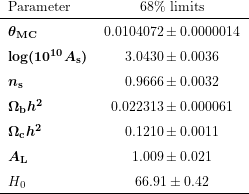

In [11]:
from IPython.display import Image
Image(filename='/tmp/table.png') 